# Funktionen und Methoden

In diesem Notebook lernen wir Funktionen und Methoden kennen. Nach einer Einführung in *Code Reuse* schauen wir uns Funktionen und Methoden besonders wichtiger Datentypen anhand eines konkreten Anwendungsfalls an. Wir lernen, wie wir selbst Funktionen schreiben können und abschließend, wie wir von fertigem Code für spezifische Anwendungsfelder in Form von Modulen profitieren können.

## Code Reuse

Die allermeisten Operationen, die wir beim Programmieren unternehmen, haben andere (und ab einem gewissen Zeitpunkt meist wir selbst auch) schon unzählige Male vorher ausgeführt. Nun sind wir erst beim vierten Notebook und dennoch haben wir uns bereits mehrfach die Länge von einem Objekt ausgeben lassen (mithilfe der ```len```-Funktion), oder überhaupt, uns Objekte mit der ```print```-Funktion ausgeben lassen. 

Ohne zu überlegen, haben wir vorgefertigte "Bausteine" von Python eingesetzt. Wenn man darüber nachdenkt, macht etwa die ```len```-Funktion nichts außergewöhnliches. Wir könnten sie einfach nachbilden, indem wir zum Beispiel bei einem ```str```-Objekt über dessen einzelne Zeichen iterieren und bei jedem Zeichen einen Zähler um 1 erhöhen. Der finale Stand des Zählers entspräche dann der Länge des strings:

In [ ]:
string = "testwort"

count = 0 #vor der Schleife initialisieren wir die Zähler-Variable mit 0

#hier iterieren wir über die einzelnen Zeichen in string
for character in string:
    count += 1 #bei jedem Zeichen erhöhen wir den Zähler um 1
    
print(count) #am Ende lassen wir uns den finalen Stand des Zählers ausgeben

Dieser Code sieht vergleichsweise simpel aus. Dennoch wäre es sehr mühselig, diese paar Zeilen jedes einzelne Mal schreiben zu müssen, wenn wir die Länge eines strings herausfinden wollen. Wie wir wissen, ist das aber nicht nötig, denn es gibt eine vordefinierte *Funktion* bei Python, auf die wir für diese Art von Operation zurückgreifen können. 

Funktionen und Methoden sind im Grunde nichts anderes als Code, der eine öfter verwendete Operation (und sei sie noch so trivial) definiert. Um wiederverwendet werden zu können, sind Funktionen/Methoden abstrakt formuliert: Anstelle konkreter Objekte stehen in ihrem Code Variablen, die, wenn wir eine Funktion/Methode *aufrufen*, mit dem Objekt *ausgefüllt* werden, auf das wir die Funktion/Methode anwenden. Anders formuliert: Wenn wir ```len(string)``` ausführen, *übergeben* wir der ```len```-Funktion unseren string. Im Code der ```len```-Funktion gibt es eine Variable, an deren Stelle nun unser string eingesetzt wird. Der Code wird also spezifisch für unseren string ausgerechnet. 

Python liefert in seiner *Grundausstattung* jede Menge nützliche Funktionen und Methoden. Davon werden wir die wichtigsten in diesem Notebook anschauen. Da es aber Fälle gibt, wo wir die ersten sind, die eine bestimmte Operation **mehrfach** ausführen müssen, ist es in Python möglich, eigene Funktionen (und Methoden, aber das klammern wir aus) zu definieren. Das schauen wir uns ebenfalls an. Ganz oft sind wir aber nicht die ersten, die eine bestimmte Operation mehrfach benötigen. Dennoch liefert Python eine entsprechende Funktion/Methode nicht in der Grundausstattung mit, da ihr Anwendungsfeld zu spezifisch ist. Hier kommen sog. *Module* ins Spiel, die wir in Python *importieren* können. Durch solche Module kommen wir an unzählige weitere nützliche Funktionen/Methoden. Wie der Import von Modulen funktioniert, schauen wir uns ganz am Ende des Notebooks an.

Wir lernen ja programmieren, weil wir damit gewisse Aufgaben effizienter ausführen können (oder sie gar erst in Angriff nehmen können, wie beim Web-Scraping-Beispiel im ersten Notebook). Mit Funktionen, Methoden und Modulen können wir bereits geschriebenen Code (wieder)verwenden, weshalb man auch von *Code Reuse* spricht. Indem wir lernen, diese vorgefertigten Bausteine miteinander zu kombinieren, je nach dem, was wir mit unserem Code erreichen wollen, lernen wir (effizient) zu programmieren.

## Funktionen vs. Methoden

Bevor wir uns konkrete Funktionen und Methoden anhand eines Anwendungsfalls anschauen, folgen ein paar grundsätzliche Bemerkungen. Funktionen haben stets folgende Syntax:

```function(object)```

Anstelle von *function* steht der Funktionsname, z.B. ```len``` und bei *object* wird der Funktion ein Objekt übergeben, etwa ein string. Wie wir bei der ```print```-Funktion gesehen haben, können bei einigen Funktionen kommasepariert auch mehrere Objekte angegeben werden. Weiter können je nach Funktion optional kommasepariert Parameter (also eine [von den Standardwerten abweichende] Spezifierung, wie die Funktion ausgeführt werden soll) angegeben werden (z.B. den ```sep```-Parameter bei der ```print```-Funktion, siehe zweites Notebook).

Methoden haben dagegen folgende Syntax:

```object.method()```

An erster Stelle steht das Objekt, auf das die Methode angewendet werden soll (etwa der string bei der ```startswith```-Methode vom dritten Notebook). Nach einem Punkt (man spricht deswegen auch von *dot notation*) steht der Methodenname und direkt anschließend runde Klammern. Oft sind die Klammern leer, da keine (von den Standardwerten abweichenden) optionalen Parameter angegeben werden (können). Bei der ```startswith```-Methode wird aber z.B. ein weiterer string erwartet, bei dem überprüft werden soll, ob er am Anfang des ersten strings steht oder nicht (vgl. drittes Notebook und unten).

Abgesehen von der Syntax unterscheiden sich Funktionen und Methoden in einem wichtigen Punkt: Methoden sind immer datentypspezifisch. Eine Methode funktioniert immer nur für einen einzigen Datentypen (es sei denn, eine gleichnamige Methode mit gleicher Funktionsweise wurde für verschiedene Datentypen definiert). Deshalb schauen wir uns unten Methoden für die Datentypen ```str```, ```list``` und ```dict``` separat an. 

Funktionen hingegen sind keinem Datentypen zugeordnet, was aber nicht heißt, dass sie auf sämtliche Objekte angewendet werden können. Die ```len```-Funktion etwa funktioniert u.a. bei strings und Listen, nicht aber bei ```int```-Objekten (vgl. zweites Notebook), da in der Funktionsdefinition von ```len``` nicht festgelegt wurde, wie die Länge eines solchen Objekts berechnet werden soll (es wäre ja auch nicht sinnvoll).

***

##  🔧 Anwendungsfall: Errechnen von Schlüsselwörtern

Stellen wir uns vor, wir haben einen langen Text und würden gerne wissen, welche Wörter darin besonders oft vorkommen, sog. *Schlüsselwörter*. Gehen wir noch einen Schritt weiter und stellen uns vor, wir hätten zwei Texte, die wir gerne im Hinblick auf Schlüsselwörter vergleichen wollen. Ein solcher Vergleich wäre z.B. bei Parteiprogrammen oder Koalitionsverträgen spannend, um zu sehen, worauf die jeweiligen Texte ihren Fokus legen und worin sie sich unterscheiden. Sagen wir, wir wollen die deutschen Koalitionsverträge von 2018 (CDU, CSU, SPD) und 2021 (SPD, Grüne, FDP) miteinander vergleichen. Die beiden Texte sind im Ordner "Dateien" gespeichert. Mit folgendem Code können wir sie in den Arbeitsspeicher laden und uns mittels Slicing jeweils die ersten 100 Zeichen ausgeben lassen.

In [ ]:
with open("../3_Dateien/Koalitionsvertraege/koalitionsvertrag_2018.txt", encoding="utf-8") as f:
    kv18 = f.read()
    print("2018:\n\n", kv18[0:100])
    
with open("../3_Dateien/Koalitionsvertraege/koalitionsvertrag_2021.txt", encoding="utf-8") as g:
    kv21 = g.read()
    print("\n\n2021:\n\n", kv21[0:100])

Wie genau der Input und Output von Dateien funktioniert, lernen wir im nächsten Notebook. Grob gesagt, übertragen wir den Inhalt der beiden Textdateien in string-Objekte. Das mit ```kv18``` referenzierte Objekt beinhält also den ganzen Koalitionsvertrag von 2018 als *ein* string, auf den wir problemlos Indexing/Slicing sowie andere uns bereits bekannte string-Operationen anwenden können. Das wollen wir gleich mal üben.

***

✏️ **Übung 1:** Finde heraus, welcher der beiden Koalitionsverträge länger ist.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.




***

✏️ **Übung 2:** Die unten bereitgestellte Liste ```buzzwords``` enthält heuristisch zusammengetragene Schlagwörter aus der Politik – erweitere die Liste gerne um eigene Begriffe, die Dich interessieren. Um einen ersten inhaltlichen Eindruck der Koalitionsverträge zu bekommen, wollen wir herausfinden, wie oft diese Begriffe in ihnen vorkommen und wie sich ihre Frequenz zwischen den Texten entwickelt. Zu diesem Zweck können wir ```count``` für strings verwenden (```kv18``` und ```kv21``` sind ja wie gesagt string-Objekte). ```count``` erlaubt es uns, das Vorkommen einer bestimmten Zeichenkette innerhalb einer anderen Zeichenkette auszuzählen. ```count``` hat folgende Syntax:

```string.count("to_be_counted")```

```"Schifffahrtsgesellschaft".count("f")``` ergäbe etwa 4.

Was bei einem Wort funktioniert, geht auch bei langen strings wie bei unseren Koalitionsverträgen.

Berechne nun wie oft jeder Begriff  auf ```buzzwords``` in den beiden Verträgen vorkommt und verwende einen geeigneten Datentypen, um Deine Ergebnisse (separat für jeden Vertrag) abzuspeichern. Lasse Dir anschließend für jeden Begriff die beiden Frequenzen sowie einen Trend über die Zeit (z.B. mittels der Emojis 📈, 📉, 🟰) ausgeben. Das Ergebnis für "Corona" sollte z.B. so aussehen:

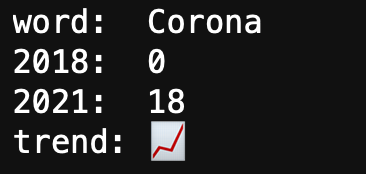

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.

buzzwords = ["Sozial", "Klima", "Europa", "Verkehr", "Landwirtschaft", "Umwelt", "Corona"]




*** 

An der Syntax hast Du es vermutlich bereits erkannt: bei ```count``` handelt es sich um die erste string-Methode, die wir in diesem Notebook kennenlernen.

Wie wir sehen, unterscheidet sich die Frequenz der Schlagwörter markant. Im Vergleich zu 2018 scheint neben "Corona" insbesondere "Klima" an Bedeutung hinzugewonnen zu haben. Alle andere Schlagwörter dagegen kommen seltener vor. Um diese "impressionistischen" Ergebnisse belastbar zu machen, müssten wir im nächsten Schritt natürlich auch die in Übung 1 festgestellte unterschiedliche Textlänge berücksichtigen, schließlich sind absolute Frequenzen abhängig von der Gesamttextlänge.

Beim Anwendungsfall in diesem Notebook wollen wir einen Schritt weiter gehen und für *jedes* einzelne Wort in den beiden Koalitionsverträgen herausfinden, wie oft es jeweils vorkommt. Anstatt Begriffe wie in Übung 2 als relevant vorauszusetzen, erhalten wir so induktiv einen fundierten Blick auf die Texte und finden vielleicht Wörter, mit deren Vorkommen wir nicht gerechnet hätten. Die ```count```-Methode wird auch da zum Einsatz kommen. Im Folgenden lernen wir alle weiteren wichtigen Funktionen und Methoden für die drei Datentypen ```str```, ```list``` und ```dict``` kennen, die es uns schließlich in Kombination ermöglichen, Schlüsselwörter für die Koalitionsverträge zu errechnen. 

***

Eine Übersicht aller wichtigen Funktionen und Methoden findet sich in den jeweiligen Cheat Sheets.

## Operationen bei Zeichenketten / strings

Bei einem langen Text verliert man schnell den Überblick darüber, was beim Ausführen von Code genau geschieht. Deswegen wollen wir erst mit einem simplen string arbeiten, um die Funktionsweise der einzelnen Operationen genau zu verstehen. Das erlernte Wissen übertragen wir später einfach auf die beiden Koalitionstexte. Der Beispielstring lautet:

In [ ]:
sentence = "Gesagt ist gesagt."

Auch wollen wir fürs Erste nur ein spezifisches Wort zählen, nämlich "gesagt". Wir wissen natürlich, dass "gesagt" in ```sentence``` vorkommt, hätten wir aber einen längeren Text, bei dem wir uns nicht sicher sind, ob ein bestimmtes Wort vorkommt, so könnten wird dies mit dem ```in```-Statement überprüfen:

In [ ]:
print("gesagt" in sentence)

Dabei erhalten wir ganz einfach den Boolschen Wert ```True``` zurück. In Kombination mit dem logischen Operator ```not``` (vgl. drittes Notebook), können wir auch das Gegenteil überprüfen und kriegen wieder einen Boolschen Wert zurück:

In [ ]:
print("getan" not in sentence)

***

✏️ **Übung 3:** Die beiden Koalitionsverträge stammen von unterschiedlichen Parteien (CDU, CSU, SPD bzw. SPD, Grüne, FDP). Finde heraus, welche beiden Parteien es mit ihrem Kurznamen in beide Verträge geschafft haben. Stelle sicher, dass die Zelle mit dem Dateiinput oben ausgeführt ist, damit die Variablen ```kv18``` und ```kv21``` mit dem jeweiligen Text initialisiert sind.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.




***

Zurück zu unserem Anwendungsfall. Bei der Wortzählung soll Groß-/Kleinschreibung keine Rolle spielen ("Gesagt" und "gesagt" sollen also zusammengezählt werden). Zu diesem Zweck bietet es sich an, sämtliche Zeichen kleinzuschreiben. Dazu verwenden wir die ```lower```-Methode, die einen kompletten string in Kleinbuchstaben konvertiert.

In [ ]:
sentence = sentence.lower()
print(sentence)

Das hat wunderbar geklappt. 

Als kleinen Einschub sehen wir in der nächsten Zelle mit ```lower``` verwandte Methoden, die allesamt mit Groß- bzw. Kleinschreibung zu tun haben:

In [ ]:
string = "heute wird es schneien."

uppercase = string.upper()
print("Alles Großbuchstaben:", uppercase, "\n")

capitalized = string.capitalize()
print("Nur der Anfangsbuchstabe großgeschrieben:", capitalized, "\n")

title = string[0:10].title() #wir können die Methode auch nur auf einen Teil des strings anwenden
print("Wie ein englischsprachiger Titel:", title, "\n")

swapped = title.swapcase() #zur besseren Veranschaulichung kehren wir den Titel um
print("Und den Titel umgekehrt:", swapped)

Als kurze Erinnerung: strings sind unveränderlich (vgl. zweites Notebook). Deswegen weisen wir das Resultat einer auf einen string angewandten Methode jeweils einer neuen Variable zu (oder überschreiben die alte, wie oben bei ```lower```). Führe den Code unten aus, um Dich selbst davon zu überzeugen, dass das ```str```-Objekt zwar im ```print```-Befehl modifiziert ausgegeben wird, das Objekt an sich aber nicht geändert wird:

In [ ]:
immutability = "Testwort"
print(immutability.lower())
print(immutability)

Zurück zu unserem Anwendungsfall. Als nächstes wollen wir den Satz *tokenisieren*, also in einzelne Wörter unterteilen. Dafür gibt es die ```split```-Methode. Sie nimmt einen string und unterteilt ihn standardmäßig bei jedem whitespace-Zeichen (die wichtigsten darunter: Leerschläge: ```" "```, Zeilenumbrüche: ```"\n"```, Tabulatoren: ```"\t"```). Die Methode gibt eine Liste mit den unterteilten Einheiten (beim standardmäßigen whitespace: Wörtern) zurück:

In [ ]:
words = sentence.split()
print(words)

Sehr gut!

***

✏️ **Übung 4:** Anstelle von whitespace, das standardmäßig als Trennzeichen von ```split``` verwendet wird (und deswegen auch nicht angegeben werden muss), können wir strings auch bei anderen Trennzeichen aufsplitten. Dazu geben wir das gewünschte Trennzeichen in den Klammern an, etwa ```"."```, wenn wir einen string in Sätze aufsplitten wollen. 

Bringe die Geschichte, die in ```sentence``` in komischer Reihenfolge erzählt wird, in die richtige Reihenfolge. Das Resultat sollte ein string mit drei richtig geordneten Sätzen sein. 

💡 Tipp: Auf dem Weg dorthin solltest Du ```split```, Indexing und Konkatenation mithilfe des ```+```-Operators verwenden (beide Techniken haben wir in den vorigen Notebooks kennengelernt).

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.

sentence = """Die beiden verliebten sich ineinander. 
Und wenn sie nicht gestorben sind, kann's sein, dass sie sich heute noch küssen.
Es war einmal ein Hase und ein Fuchs."""



***

Kehren wir zu unserem Anwendungsfall zurück. Bevor wir uns die Wortfrequenzen auszählen lassen können, haben wir noch ein Problem: Beim zweiten "gesagt" hängt am Ende ein Punkt dran, der nicht zum Wort gehört. Um diesen loszuwerden können wir die ```strip```-Methode verwenden. Sie nimmt einen string und entfernt standardmäßig sämtliche whitespace-Zeichen am Anfang (leading) und Ende (trailing) eines strings. Sie ermöglicht aber auch das Entfernen von benutzerdefinierten Zeichen. So können wir den Punkt beim dritten Element (mit Index 2!) auf der Liste ```words``` enfternen:

In [ ]:
words[2] = words[2].strip(".")
print(words)

Nun haben wir eine Liste mit bereinigten Wörtern. 

***

✏️ **Übung 5:** Selbstverständlich kann man das Vorkommen eines Wortes auf einer Liste auszählen lassen (das lernen wir bei den Methoden für Listen). Hier wollen wir aber die oben bereits kennengelernte ```count```-Methode für strings noch einmal anwenden. Dazu müssen wir die Listenelemente wieder zu einem string konkatenieren. Verwende eine Dir bereits bekannte ```str```-Methode, um aus ```words``` wieder einen string zu kreieren. Eine Variable namens ```sentence_again``` soll auf diesen string zeigen. 

Benutze anschließend die ```count```-Methode, um "gesagt" in ```sentence_again``` zu zählen.  Das Resultat sollte natürlich zwei sein.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.




***

Nun haben wir einige ```string```-Methoden kennengelernt und uns die Frequenz eines einzelnen Wortes auf sehr rudimentäre Art auszählen lassen. In der Regel (und so auch bei unseren Koalitionsverträgen) haben wir es nicht mit so kurzen strings zu tun und wir wollen nicht bloß die Häufigkeit eines einzelnen Wortes erfahren, sondern sämtliche Wortfrequenzen ermitteln. Für ein Schlüsselwörter-Skript fehlen uns noch Kenntnisse im Umgang mit Listen und dictionaries, die wir gleich kennenlernen. Erst besprechen wir noch ein paar weitere ```str```-Methoden. 

Die bereits bekannte ```strip```-Methode gibt es auch in den Ausführungen ```rstrip``` und ```lstrip```, die whitespace-Zeichen (oder das/die benutzerdefinerte(n) Zeiche(n)) nur jeweils am Anfang (```rstrip```) bzw. am Ende (```lstrip```) entfernen:

In [ ]:
sentence = "...ganz viele komische Zeichen/%§..§//§§...."
print("Links entfernt:", sentence.lstrip("."), "\nRechts entfernt:", sentence.rstrip(".%§/")) #es können mehrere zu entfernende Zeichen spezifiziert werden

Weiter gibt es die Methode ```find``` zum Finden bestimmter Zeichen(ketten) innerhalb eines strings. Die Methode nimmt einen string sowie die zu findende Zeichenkette als Parameter und gibt den Index des ersten Zeichens des ersten Vorkommens der zu findenden Zeichenkette zurück.

In [ ]:
sentence = "Die Freiheit des einen ist die Freiheit des anderen."
print(sentence.find("Freiheit"))

#die find-Methode im Einsatz als Indizes bei Indexing und Slicing
print(sentence[sentence.find("Freiheit"):sentence.find("anderen")]) #Einsatz der durch find zurückgegeben Indizes als Slicing-Indizes
print(sentence[sentence.find("Freiheit")+1:].find("Freiheit")) #Finden des zweiten Vorkommens von "Freiheit", indem das erste Vorkommen "weggeslict" wird (der Index bezieht sich auf den geslicten Satz und nicht auf sentence!)

Da die ```find```-Methode nur jeweils den Index des ersten Vorkommens einer Zeichenkette zurückgibt, ist sie von begrenztem Nutzen. Im sechsten Notebook zu regulären Ausdrücken (RegEx) lernen wir sinnvollere Funktionen/Methoden kennen, die Python nicht direkt mitliefert, sondern erst importiert werden müssen.

Neben dem Finden von bestimmten Zeichen(ketten), können wir auch Substrings in strings ersetzen. Dies geht mit der ```replace```-Methode, die sogar zwei Parameter in Klammern verlangt: Erstens den zu ersetzenden Substring und zweitens den Substring, der als Ersatz genommen werden soll:

In [ ]:
sentence = "New York ist die Hauptstadt der USA."
sentence = sentence.replace("New York", "Washington DC")
print(sentence)

Würde "New York" mehrfach in ```sentence``` vorkommen, so würden alle Vorkommen durch "Washington DC" ersetzt werden. 

Den beiden letzten Methoden ```startswith``` und ```endswith``` sind wir schon im letzten Notebook begegnet. Sie überprüfen, ob ein string mit einer bestimmten Zeichenkette beginnt oder endet und liefern Boolsche Werte zurück. Von daher kann man sie gut in bedingten Anweisungen einsetzen.

In [ ]:
sentence = "Der frühe Vogel fängt den Wurm."
print(sentence.startswith("Der"))
print(sentence.startswith(("Der", "Die", "Das"))) #mehere Zeichenketten können in einem Tupel angegeben werden, ergibt True wenn eine der Zeichenketten am Anfang des Objekts steht
print(sentence.endswith("Wurm")) #ergibt False, da danach noch ein Punkt folgt

#Methoden können übrigens aneinander gehängt werden. Python wendet erst lower an, dann startswith; ohne lower ergäbe dieses if-Statement False
if sentence.lower().startswith("der"):
    print("Der Satz fängt mit einem maskulinen Artikel an.")

***

✏️ **Übung 6:** Verwende ```str```-Methoden, um aus ```names``` eine Liste mit Namen wie folgt zu kreieren: ```['Martin Berger', 'Kirsten Hauser', 'Michaela Kircher', 'Fritz Hofer']```. Die Namen sollen vollkommen von leading und trailing whitespace bereingt und mit korrekter Groß-/Kleinschreibung vorliegen. 

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.
names = "Name: Martin Berger name: Kirsten Hauser NAME: Michaela Kircher nAME: Fritz Hofer"




***

## Operationen bei Listen

Machen wir weiter mit dem Datentyp ```list```. Oben hatten wir es ja kurzzeitig mit einer Liste zu tun, die wir dann aber pro forma wieder in einen string konvertierten. Wenn man Wörter in einem Text bereinigen will, etwa mit dem Ziel, Schlüsselwörter zu errechnen, ist es tatsächlich aber viel praktischer, mit einer Liste weiterzuarbeiten. Während ein string einfach *eine* lange Aneinanderkettung von Zeichen ist, liegen uns die Wörter auf einer Liste in *diskreten Einheiten* vor. Mittels Iteration können wir dann bestimmte Schritte des *preprocessing* (so nennt sich diese Technik) Wort für Wort vornehmen. 

Das typische Vorgehen beim preprocessing ist also 

1) einen string in eine Liste mit Wörtern unterteilen (```split```)
2) über die Liste iterieren und preprocessing-Methoden (```lower```, ```strip``` sowie ggf. andere) Wort für Wort anwenden
3) jedes bereinigte Wort an eine neue Liste anhängen (```append```)

```append``` sind wir bereits im letzten Notebook begegnet. Mithilfe dieser Listenmethode können wir ein Element an eine Liste anhängen. Der folgende Code vereint die bisher erlernten Schritte im Hinblick auf unseren Anwendungsfall. 

Wichtig: die neue Liste mit den bereingten Wörtern muss erst ins Leben gerufen werden, bevor wir Elemente an sie anhängen können. Das tun wir indem wir die Variable ```preprocessed_words``` gleich zu Beginn mit einer leeren Liste initialisieren (mithilfe der entsprechenden Syntax, hier eben eckige Klammern, kann man auch leere Objekte anderer Datentypen initialisieren).

In [ ]:
sentence = "Gesagt ist gesagt."
words = sentence.split()

preprocessed_words = []

for word in words:
    word = word.lower()
    word = word.strip(".")
    preprocessed_words.append(word)

print(preprocessed_words)

Klappt ausgezeichnet.  

Überleg Dir für einen Augenblick, warum wir bei den strings das Resultat der Methoden ```lower``` bzw. ```strip``` einer Variablen zuweisen (besser gesagt: die Variable ```word``` damit jeweils *überschreiben*). Das Resultat von ```append```, also die Liste mit dem neu angehängten Wort, weisen wir dagegen keiner Variablen zu. 

Genau, das liegt daran, dass string-Objekte unveränderlich und Listenobjekte veränderlich sind. Wollen wir mit einem veränderten string weiterarbeiten, müssen wir ihn einer Variablen zuweisen, denn das originale string-Objekt wird die Veränderung aufgrund seiner Unveränderlichkeit *nie* übernehmen. Listenobjekte hingegen können wir beliebig verändern, weswegen das Schaffen eines neuen bzw. Überschreiben eines alten Objekts (mittels Variablenzuweisung) nicht nötig ist. 

```append``` hängt ein Element immer am Ende einer Liste an. Daneben gibt es auch die Methode ```insert```, die es uns erlaubt, ein Element an einer bestimmten Position in der Liste, d.h. bei einem bestimmten Index, einzufügen:

In [ ]:
preprocessed_words.insert(2, "nicht")
print(preprocessed_words)

Schau was passiert, wenn Du diese Zelle mehrfach ausführst. 

Auch dieses Verhalten geht auf die Veränderlichkeit von Listen zurück. Nach einmal Ausführen referenziert ```words``` folgende Liste ['Gesagt', 'ist', 'nicht', 'gesagt.'] im Arbeitsspeicher. Bei der nächsten Ausführung wird ```insert``` auf das nun veränderte ```words``` angewandt, etc. Dieser und der oben geschilderte Umstand sind fortgeschrittenes theoretisches Wissen, sie zeigen aber, dass die (Un)veränderlichkeit von Objekten durchaus einen Effekt haben kann. 

Es gibt noch eine dritte Methode, um eine Liste zu erweitern. Sie heißt ```extend``` und wird dann verwendet, wenn wir die Elemente eines iterierbaren Objekts einzeln an eine Liste anhängen wollen. Schau, was passiert, wenn Du den folgenden Code mit ```extend``` ausführst vs. was passiert, wenn Du stattdessen ```append``` verwendest. Der Unteschied ist subtil, aber durchaus bedeutend. Welche Methode macht hier mehr Sinn?

In [ ]:
shopping_list = ["Bananen", "Orangen", "Kiwis"]

vegetables = ["Gurke", "Tomate", "Avokado"]

shopping_list.extend(vegetables)
#shopping_list.append(vegetables)
print(shopping_list)

```append``` behandelt die Liste ```vegetables``` einfach als *ein* Element. Wir wollen aber keine Liste in der Liste, weswegen hier ```extend``` sinnvoller ist.

Wie oben erwähnt kann man sich die Häufigkeit eines Worts (genauer gesagt: eines Elements) auf einer Liste auszählen lassen. Die ```count```-Methode für Listen hat den gleichen Namen und die gleiche Funktion wie bei strings:

In [ ]:
print(preprocessed_words.count("gesagt"))

Auch diese Methode wird uns später beim Errechnen von Schlüsselwörtern für die Koalitionstexte helfen.

Neben den Methoden, zum Erweitern einer Liste, gibt es natürlich auch solche zum Entfernen von Elementen auf einer Liste. Konkret folgende zwei: ```remove``` und ```pop```. ```remove``` entfernt das in Klammern angegebene Element auf einer Liste, allerdings nur das erste:

In [ ]:
cities = ["Pretoria", "Buenos Aires", "Malaga", "Malaga"]
cities.remove("Malaga")
print(cities)

Bei ```pop``` dagegen geben wir nicht das zu entfernende Element an, sondern dessen Index. Geben wir keinen Index an, so wird standardmäßig das letzte Element auf der Liste (also dasjenige mit dem Index ```-1```) entfernt. Bevor ein Element aus der Liste entfernt wird, gibt ```pop``` das betreffende Element noch zurück. Um dies zu verstehen, führe die folgende Zelle solange aus, bis Du eine Fehlermeldung erhältst:

In [ ]:
print("Das letzte Element der Liste wird nun entfernt:", cities.pop())
print("Die Liste beinhaltet nun noch:", cities)

Als erstes wird "Malaga" zurückgegeben und anschließend von der Liste entfernt, danach "Buenos Aires" und schließlich "Pretoria". Dann erhalten wir eine Fehlermeldung, denn Python kann natürlich kein "letztes Element" auf einer *leeren* Liste finden. ```pop``` ist immer dann interessant, wenn wir Elemente an einer bestimmten Position in der Liste entfernen wollen, unabhängig davon, um was für ein Element es sich handelt (da würden wir ```remove``` benutzen).

Bemühen wir dafür noch mal das Gesellschaftsspiel-Skript aus dem letzten Notebook. In der Übung dazu hast Du ein Skript geschrieben, bei dem der Beitritt ins Spiel nicht mehr möglich ist (die Iteration wird mit ```break``` abgebrochen), sobald sechs Teilnehmer:innen im Spiel sind. In der Zelle unten steht die Musterlösung zu jener Aufgabe, neu mit einer längeren Liste an Spielanwärter:innen und einer nicht mehr hardgecodeten Mindest- und Maximalanzahl Teilnehmer:innen.
***

✏️ **Übung 7:** Modifiziere den Code nun derart, dass bei sechs Teilnehmer:innen diejenige Person aus dem Spiel "gekickt" wird, die bereits am längsten daran teilnimmt (bzw. sich bereits am längsten auf der Teilnehmer:innenliste befindet). Im gleichen Zug soll die nächste Person aus ```participants_pool``` ins Spiel gelassen werden. Wie beim letzten Mal auch, möchten wir bei jeder Iteration informiert werden, wer gerade im Spiel ist.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.

participants_pool = ["Max", "Moritz", "Janine", "Hussein", "Fritz", "Mia", "Marianne", "Dolores", "Yin", "Margareth", "Benni"]

participants_game = []

min_participants = 4
max_participants = 6

for name in participants_pool:
    if len(participants_game) < min_participants-1:
        participants_game.append(name)
        print("Noch nicht genügend Teilnehmer:innen, wir brauchen noch", min_participants-len(participants_game), "😬")
        
        #zur Überprüfung der aktuellen Teilnehmer:innenliste
        print("Aktuell auf der Liste:", participants_game, "\n")
        continue
        
    elif len(participants_game) >= max_participants:
        print("Leider ist das Spiel voll 🥲")
        print("Aktuelle Teilnehmer:innen: ", participants_game)
        break
        
    elif len(participants_game) >= max_participants:
        participants_game.pop(0)
        
    participants_game.append(name)
    print("Das Spiel läuft 😍")
    
    #zur Überprüfung der aktuellen Teilnehmer:innenliste
    print("Aktuell auf der Liste:", participants_game, "\n")

*** 

Mit dem hier verwendeten Know-How können wir ohne allzu viel Modifikationen auch ein sog. n-gram-Skript schreiben. N-gramme sind u.a. in der Korpuslinguistik sehr beliebte Analyseeinheiten. Anstatt einzelne Wörter (oder andere Einheiten, siehe unten) zu betrachten, schaut man sich z.B. immer zwei aufeinanderfolgende Wörter an, oder aber drei aufeinanderfolgende, etc. Im ersten Fall spricht man von Wort-Bigrammen, im zweiten von Wort-Trigrammen. 

Der Satz "Ich gehe am Abend noch spazieren" enthält also folgende Wort-Bigramme: "Ich gehe", "gehe am", "am Abend", "Abend noch", "noch spazieren". Da Sprachproduktion in vielerlei Hinsicht regelhaft ist, kann man solche Wort-Bigramme u.a. heranziehen, um Texte in bestimmte Textsorten zu klassifizieren (der Annahme folgend, dass bestimmte Wort-Bigramme überdurchschnittlich häufig in bestimmten Textsorten auftreten) oder um Fragen der Autorschaft eines Textes zu klären (der Annahme folgend, dass bestimmte Wort-Bigramme von bestimmten Autor:innen überdurschnittlich häufig verwendet werden). 

Allgemein formuliert erhalten wir n-gramme, indem wir einen Text (oder sonst eine sequentielle Datei) in kleinere Einheiten unterteilen (oftmals eben Wörter, aber auch Sätze, Phrasen oder Buchstaben etc. sind möglich) und dann *n* aufeinanderfolgende (also in der Sequenz konsekutiv auftretende) Einheiten als ein n-gram zusammenfassen. 

***

✏️ **Übung 8:** Deine Aufgabe ist es nun, ein Skript zu schreiben, dass den oben im Beispiel verwendeten Satz nimmt und die darin vorkommenden Wort-Bigramme auf der Liste ```all_ngrams``` speichert. Neben ```all_ngrams``` wirst Du als Zwischenschritt beim Zusammentragen der Wort-Bigramme eine zweite Liste namens ```current_ngrams``` brauchen. Beide Listen sind bereits im Code gegeben und werden leer initialisiert. 

Wie erwähnt ist dieses Problem dem obigen im Gesellschaftsspiel-Skript sehr ähnlich. Denk daran, so wenig wie möglich zu hardcoden. Konkret: Verwende, wo möglich, Variablen, sodass Dein Skript problemlos auch für andere Sätze oder zum Errechnen von Tri-, Quadrigrammen etc. benutzt werden kann. 

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.

sentence = "Ich gehe am Abend noch spazieren"

all_ngrams = []
current_ngram = []




***

Sehr gut!

Wie erwähnt gibt es immer mehrere, gleichwertige Lösungen für ein bestimmtes Programmierproblem. Um das zu exemplifizieren, findest Du in der folgenden Zelle *eine* weitere Methode zur Berechnung von n-grammen. Der Code ist ziemlich kompakt und wird im Anschluss an die Zelle erläutert. Versuche aber erst, ihn selbst nachzuvollziehen.

In [ ]:
sentence = "Ich gehe am Abend noch spazieren"
words = sentence.split()
n = 2

ngrams = []

for i in range(len(words)-n+1):
    ngrams.append(" ".join(words[i:i+n]))

print(ngrams)

Die ersten paar Zeilen des Codes sind die gleichen wie in der ersten Variante. Der Unterschied spielt sich in der `for`-Schleife ab: In der ersten Variante wird grob formuliert in jeder Iteration ein neues n-gram (`current_ngram`) geschaffen, indem das bisher erste Wort vom letzten n-gram entfernt wird und ein neues hinten angehängt wird. Jedes n-gram wird dann `all_ngrams` angehängt. In der zweiten Variante hier "schieben" wir hingegen eine Art "Fenster" über `words`: Mittels Slicing schneiden wir uns eine neue Liste von der Länge `n` aus `words` heraus und rücken bei jeder Iteration den Start- und Endindex für das Slicing um eine Position vor. Die neue Liste fügen wir jeweils mit der uns aus dem zweiten Notebook bekannten `join`-Methode zu einem string zusammen und hängen den als n-gram `ngrams` an. Das Resultat ist natürlich dasselbe wie bei der ersten Variante. 

Zurück zu den Operationen bei Listen: Wie bei strings mit der ```find```-Methode, kann man auch in Listen nach einem bestimmten Element suchen und kriegt den Index (des ersten Vorkommens) zurück. Bei Listen nennt sich die entsprechende Methode allerdings ```index```:

In [ ]:
shopping_list = ["Bananen", "Orangen", "Kiwis"]
print(shopping_list.index("Kiwis"))

Probier gerne aus, was passiert, wenn Du nach einem Element suchst, das nicht in der Liste enthalten ist. 

Um zu überprüfen, ob ein Element in einer Liste enthalten ist (und wenn nein, um einer Fehlermeldung vorzubeugen), kann man wie bei strings das ```in```-Statement einsetzen:

In [ ]:
print("Erdbeeren" in shopping_list)

***

✏️ **Übung 9:** Erinnerst Du Dich an die Übung mit den beiden Einkaufslisten, die zu einer zusammengeführt werden sollten, aus dem zweiten Notebook? Damals haben wir mithilfe von ```set``` sichergestellt, dass keine doppelten Elemente auf der zusammengeführten Einkaufsliste vorkommen. In dieser Übung wollen wir es etwas manueller machen (zu Übungszwecken sehen wir vom oben verkündeten Code-Reuse-Mantra ab). Iteriere über eine der beiden Listen und füge der anderen Liste sämtliche Lebensmittel an, sofern sie nicht bereits auf dieser anderen Liste stehen. Gib Dir anschließend die andere Liste aus. Diese sollte dann einer zusammengeführten Liste entsprechen.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.

my_shopping_list = ["Brot", "Orangen", "Feldsalat", "Hafermilch"]
partner_shopping_list = ["Hafermilch", "Kekse", "Mehl", "Brot"]




***

Abschließend wollen wir zwei Listenmethoden anschauen, mit denen wir die Elemente auf einer Liste neu sortieren können: ```sort``` und ```reverse```. ```sort``` sortiert eine Liste standardmäßig in aufsteigender Reihenfolge. Folgende Beispiele mit Zahlen und strings veranschaulichen dies:

In [ ]:
list_of_strings = ["Beta", "Gamma", "Alpha", "Delta"]
list_of_numbers = [2,3,6,4,1,5]

list_of_strings.sort()
list_of_numbers.sort()

print(list_of_strings, list_of_numbers)

Handelt es sich bei den Listenelementen um strings, so wird alphabetisch sortiert (und nicht etwa nach dem griechischen Alphabet 😉). 

```sort``` nimmt optional Parameter. Zum Beispiel kann spezifiziert werden, dass in absteigender Reihenfolge sortiert werden soll:

In [ ]:
list_of_numbers.sort(reverse=True)
print(list_of_numbers)

Ebenso kann man mit dem ```key```-Parameter angeben, nach welchem benutzerdefinierten Kriterium sortiert werden soll. Wir könnten eine Liste von strings z.B. nach der Länge der strings sortieren. Dazu brauchen wir eine etwas komplizierte sog. lambda-Funktion (noch so ein griechischer Buchstabe...). Ohne die Details genauer zu erläutern, der hier verwendete ```key```-Parameter geht Element (```x```) für Element auf der Liste durch und rechnet für jedes Element seine Länge aus und sortiert anschließend die Liste nach den jeweils errechneten Längen:

In [ ]:
list_of_strings.sort(key=lambda x: len(x))
print(list_of_strings)

Wie wir sehen, wurde die Liste im zweiten Schritt wieder standardmäßig alphabetisch sortiert.

Im Zusammenhang mit ```sort``` ist auch die Funktion (!) ```sorted``` interessant. ```sorted``` nimmt ein iterierbares Objekt (in Klammern, da eine Funktion!) und gibt eine sortierte Liste zurück. Die Funktion akzeptiert also Listen selbst, aber u.a. auch dictionaries oder strings:

In [ ]:
a_list = [1.43, 1.44, 1.42, 1.41]
dictionary = {"haben": 28, "sein": 35}
string = "abcDEF"

a_list_sorted = sorted(a_list)
dictionary_sorted = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
string_sorted = sorted(string)

print(a_list_sorted, "\n", dictionary_sorted, "\n", string_sorted)
print(type(dictionary_sorted))

In dieser Zelle lernen wir Folgendes:
    
- Auch ```sorted``` sortiert standardmäßig in aufsteigender Reihenfolge. Hier können wir ebenfalls ```reverse=True``` spezifizieren, um die absteigende Reihenfolge zu erhalten.
- Bei strings wird jedes einzelne Zeichen als zu sortierendes Element behandelt.
- Großbuchstaben stehen im Alphabet vor Kleinbuchstaben (das gilt übrigens auch für die Listenmethode ```sort```).
- Der ```key```-Parameter kann ebenfalls benutzerdefiniert werden. Im Falle des dictionary geht Python Schlüssel-Werte-Paar (```x```) für Schlüssel-Werte-Paar durch, nimmt den Wert (```x[1]```; ```x[0]``` wäre der zugehörige Schlüssel) und sortiert nach den Werten. Zur verwendeten ```items```-Methode für dictionaries siehe unten.
- Das Resultat von ```sorted``` weisen wir *immer* einer Variable zu, unabhängig von der (Un)veränderlichkeit des betreffenden Objekts. Grund dafür ist, dass Funktionen, im Gegensatz zu Methoden, immer nur Werte zurückgeben, nie aber etwas an den ihnen übergegeben Objekten verändern. 
- Sortieren wir ein dictionary, so erhalten wir eine Liste zurück. Alles andere würde keinen Sinn ergeben, denn dictionaries "speichern" ihre Schlüssel-Werte-Paare nicht in einer bestimmten Reihenfolge "ab".

Abschließend schauen wir uns noch ```reverse``` an. Wie der Name sagt, kehrt diese Methode ganz einfach die Reihenfolge einer Liste um:

In [ ]:
list_of_letters = ['z', 'y', 'x', 'w', 'v', 'u', 't', 's', 'r', 'q', 'p', 'o', 'n', 
                   'm', 'l', 'k', 'j', 'i', 'h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

list_of_letters.reverse()

print(list_of_letters)

In diesem Beispiel hätte `sort` natürlich den gleichen Effekt gehabt. Soviel zum Thema Listen. 

Bevor wir zu dictionaries übergehen, werfen wir noch einen Blick auf die Technik *List Comprehension*. Es handelt sich dabei um eine fortgeschrittene Technik, mit der Listen auf sehr elegante Weise erzeugt werden können. Alles, was wir gleich mithilfe einer List Comprehension angehen, kannst Du bereits mithilfe anderer Techniken lösen. Der Vorteil von List Comprehensions besteht darin, dass wir viele Schritte auf eine einzige Zeile Code komprimieren können. Ob Du zukünftig List Comprehension verwendest oder nicht, steht Dir frei. In jedem Fall macht es Sinn, dass Du die Technik gesehen hast und weißt, wozu sie eingesetzt wird.

### Exkurs: List Comprehension

Am Anfang des Abschnitts [Operationen bei Listen](#Operationen-bei-Listen) haben wir die bis dahin erlernten Schritte des Preprocessing wie folgt zusammengefasst:

In [ ]:
sentence = "Gesagt ist gesagt."

#eigentlicher Code
words = sentence.split()
preprocessed_words = []
for word in words:
    word = word.lower()
    word = word.strip(".")
    preprocessed_words.append(word)

print(preprocessed_words)

Dieser Code eignet sich wunderbar, um aus einem string eine Liste mit bereinigten Wörtern zu erstellen. Er besteht aus sechs Zeilen Code und ließe sich zwar auf drei Zeilen komprimieren (probier's aus!), nicht jedoch auf eine einzige Zeile wie hier: 

In [ ]:
preprocessed_words = [word.lower().strip(".") for word in sentence.split()]

print(preprocessed_words)

Das ist eine List Comprehension. Sie verpackt sämtliche Schritte von oben in *eine* Zeile Code. Das Resultat ist dasselbe. 

Knapp formuliert iterieren wir hier – wie bei einer ```for```-Schleife – Wort für Wort (```word[...] for word```) über eine Liste mit (noch unbereinigten) Wörtern (```sentence.split()```) und wenden die Methoden ```lower``` und ```strip``` auf jedes Wort an (Methoden können wie bereits oben gezeigt einfach aneinander gehängt werden). Das bereingte Wort wird dann eine neue Liste angehängt, die, sobald komplett, mit ```preprocessed_words``` referenziert wird. Dass die bereinigten Wörter nach und nach an diese neue Liste angehängt werden, geht nicht klar aus dem Code hervor (im Gegensatz zur langen Version oben, wo wir ein Wort nach dem anderen mittels ```append``` an die neue Liste anhängen). Die Kürze des Codes geht hier also auf Kosten der Verständlichkeit.

Schauen wir uns die einzelnen Bestandteile einer List Comprehension in ihrer grundlegenden Syntax an:

```new_list = [expression for element in iterable]```

Eine List Comprehension wird **immer** von eckigen Klammern umrahmt (die eckigen Klammern machen auch deutlich, dass das Result der List Comprehension stets eine Liste ist). Innerhalb der Klammern gibt es stets folgende drei Bestandteile:
- ```iterable``` definiert das Objekt, über das wir iterieren.
- ```element``` ist die Variable für das einzelne Element bei der Iteration über ```iterable``` (im Beispiel oben, in der ersten Iteration "Gesagt", in der zweiten "ist", in der dritten "gesagt."). Die Variable kann wie immer frei benannt werden.

Bis hierhin entspricht die Syntax dem Anweisungskopf einer ```for```-Schleife. Was nun bei einer ```for```-Schleife im  Anweisungskörper steht (im Beispiel oben die Methoden ```lower```, ```strip``` und ```append```), wird bei einer List Comprehension in die ```expression``` verpackt:

- ```expression``` definiert i.d.R. einen komplexen Ausdruck, der nach und nach auf jedes ```element``` angewandt wird (im Beispiel oben werden ```lower``` und ```strip``` auf jedes ```element``` angewandt). Zur Erinnerung: Ein komplexer Ausdruck ergibt, wenn ausgerechnet, immer einen Wert (vgl. erstes Notebook). Genau dieser Wert wird an die durch die List Comprehension entstehende, neue Liste angehängt (```new_list```). Wie wir unten sehen werden, kann anstatt eines komplexen Ausdrucks auch nur die Variable ```element``` (ohne dass z.B. eine Methode angewandt würde) oder gar ein ganz anderes Objekt da stehen.

Neben dem ```append```-Schritt fällt bei List Comprehensions auch das Initialisieren einer leeren Liste vor der ```for```-Schleife (an die innerhalb der Schleife dann die einzelnen bearbeiteten Elemente angehängt werden) weg. Man könnte sagen, dass wir uns bei List Comprehensions mehr darauf fokussieren können, *was* in der neuen Liste landen soll, anstatt uns damit zu beschäftigen *wie* die neue Liste konstruiert wird (vgl. [realpython.com](https://realpython.com/list-comprehension-python/))

List Comprehensions können aber noch mehr. In Kombination mit bedingten Anweisungen können sie auf folgende zwei Arten noch gezielter eingesetzt werden:

1) Wir können einen Filter auf das Objekt anwenden, über das wir iterieren (```iterable```). Wir definieren dazu eine bedingte Anweisung, die bei jedem ```element``` überprüft, ob die Bedingung zutrifft. Nur wenn die Bedingung zutrifft, wird ```expression``` auf ```element``` angewandt und der daraus resultierende Wert an die neue Liste angehängt. Die grundlegende Syntax wird dafür folgendermaßen erweitert:

    ```new_list = [expression for element in iterable if condition]```

Dies können wir z.B. benutzen, um aus aus einem string sämtliche kurzen Wörter herauszufiltern, hier am Beispiel des ersten Absatzes des ersten Artikels des deutschen Grundgesetzes:

In [ ]:
constitution = "Die Würde des Menschen ist unantastbar. Sie zu achten und zu schützen ist Verpflichtung aller staatlichen Gewalt."

short_words = [word for word in constitution.split() if len(word) < 4]
print(short_words)

Wie oben erwähnt, kann, wie hier, bei ```expression``` nur die Variable für ```element``` stehen. So verwenden wir die List Comprehension schlicht zum Erstellen einer gefilterten Liste, ohne dabei die Elemente, die es "in die Liste schaffen" zusätzlich zu modifizieren. 

Natürlich lässt sich das Filtern auch mit der Anwendung eines komplexen Ausdrucks kombinieren:

In [ ]:
long_words = [word.strip(".") for word in constitution.split() if len(word) > 10]
print(long_words)

Hier entfernen wir mittels ```strip``` bei ```expression``` den Punkt am Ende von "unantastbar.".

2) Wir können die Anwendung von ```expression``` an eine bedingte Anweisung knüpfen. Konkret können wir zwei verschiedene ```expressions``` definieren, die abhängig davon, ob die Bedingung auf das jeweilige ```element``` zutrifft, angewandt werden. Die grundlegende Syntax sieht so aus:

    ```new_list = [expression1 if condition else expression2 for element in iterable]```

Damit können wir z.B. die oben vorgestellte ```swapcase```-Methode nachprogrammieren:

In [ ]:
swapped_case_list = [letter.lower() if letter.isupper() else letter.upper() for letter in constitution]

swapped_case_string = "".join(swapped_case_list)

print(swapped_case_string)

#Überprüfen, ob das Resultat dasselbe wie bei der swapcase-Methode ist
print(swapped_case_string == constitution.swapcase())

Bei jedem ```letter``` wird überprüft, ob es sich um einen Großbuchstaben handelt, und wenn ja, wird ```letter.lower()``` darauf angewandet (```expression1```), andernfalls ```letter.upper()``` (```expression2```). In jedem Fall wird der modifizierte Buchstabe an die neue Liste ```swapped_case_list``` angehängt. Mit ```join``` fügen wir die einzelnen Listenelemente wieder zu einem string zusammen.

Die beiden Varianten der Einbindung von bedingten Anweisungen in List Comprehensions lassen sich auch miteinander kombinieren. Das führt jedoch zu ziemlich langen, schwierig zu lesenden Codezeilen, weswegen davon i.d.R. abgesehen wird.

***

✏️ **Übung 10:** ```temperatures``` ist eine Liste mit unterschiedlichen Messtemperaturen in Grad Celsius. Sie beinhält positive und negative Werte sowie fehlende Werte, die mit "NA" gekennzeichnet sind (für *not available*, etwa weil das Thermometer ausfiel). Erstelle nun mittels List Comprehension folgende neuen Listen. Überlege Dir jeweils genau, an welcher Stelle in der List Comprehension Du die bedingte Anweisung einbauen musst.   

1. ```temperatures_preprocessed``` soll eine Liste referenzieren, die nur numerische Werte enthält.

Erstelle ausgehend von ```temperatures_preprocessed``` diese zwei weiteren Listen.

2. ```positives_replaced``` soll eine Liste referenzieren, auf der sämtliche positiven Werte durch 0.0 ersetzt werden.
3. ```only_positives``` soll eine Liste referenzieren, die nur positive Werte beinhält.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.

temperatures = [18.6, 23.4, "NA", 12.2, -3.1, 33.7, -10.9, -17.8, "NA", 7.0, 9.1, -0.2, 0.0, 8.6, "NA", "NA", 39.4, -29.8]




***

## Operationen bei dictionaries

Um abschließend Operationen bei dictionaries kennenzulernen, verwenden wir folgendes dictionary mit österreichischen Bundesländern:

In [ ]:
federal_states = {"Vorarlberg": "Bregenz", "Tirol": "Innsbruck", "Kärnten": "Klagenfurt",
                "Steiermark": "Graz"}

Um die Hauptstadt zu einem Bundesland zu erhalten, also den Wert zu einem Schlüssel, können wir, wie wir bereits gesehen haben, folgende Syntax verwenden:

In [ ]:
print(federal_states["Steiermark"])

Was passiert, wenn wir den Wert zu einem Schlüssel erfragen, der nicht im dictionary ist?

In [ ]:
print(federal_states["Oberösterreich"])

Sind wir uns nicht sicher, ob ein Schlüssel in einem dictionary existiert, bietet sich folgende dictionary-Methode an:

In [ ]:
print(federal_states.get("Oberösterreich", "Schlüssel nicht vorhanden"))

Der zweite Parameter ist optional. Geben wir nichts an, so erhalten wir im Falle eines inexistenten Schlüssels ```None``` zurück. Wie bei strings und Listen können wir die Existenz eines Schlüssels in einem dictionary auch mittels ```in``` überprüfen:

In [ ]:
print("Oberösterreich" in federal_states)

Oberösterreich ist aber natürlich ein österreichisches Bundesland, wir sollten unser dictionary also erweitern. Ein neues Schlüssel-Werte-Paar kreieren wir ganz einfach wie folgt:

In [ ]:
federal_states["Oberösterreich"] = "Linz" #definieren eines neuen Schlüssel-Werte-Paars
print(federal_states["Oberösterreich"]) #überprüfen wir dies gleich

Angenommen, ein Bundesland erhielte eine neue Hauptstadt, so könnten wir gleichermaßen ein bestehendes Schlüssel-Werte-Paar überschreiben (probier's aus!).

Was machen wir, wenn z.B. Vorarlberg aus der Republik Österreich austritt? Dafür gibt es das ```del```-Statement, das eine gewöhnungsbedürftige Syntax aufweist:

In [ ]:
del federal_states["Vorarlberg"]
print(federal_states)

Genau wie bei Listen gibt es auch für dictionaries eine ```pop```-Methode, bei der allerdings nicht ein Index angegeben wird (dictionaries haben keine Reihenfolge!), sondern ein Schlüssel:

In [ ]:
federal_states.pop("Oberösterreich")

Wie Du siehst, gibt ```pop``` bei dictionaries ebenfalls den Wert zurück, bevor es das Schlüssel-Werte-Paar aus dem dictionary entfernt, wie sich wie folgt überprüfen lässt:

In [ ]:
print(federal_states)

Was passiert, wenn Du den ```pop```-Befehl nochmal ausführst? 

Dieses Verhalten liegt wiederum daran, dass dictionaries veränderlich sind (was wie bei Listen der Grund ist, warum wir das Resultat einer dictionary-Methode nicht einer neuen Variablen zuweisen). Wenn wir ein Schlüssel-Werte-Paar einmal entfernt haben, kann es nicht ein zweites Mal entfernt werden, denn es existiert ja nicht mehr. Solltest Du irgendwann auf Fehlermeldungen in diesem Abschnitt stossen (abgesehen von den Stellen, wo es intendiert ist), dann liegt das wahrscheinlich daran, dass Du die Zellen nicht in der richtigen Reihenfolge maximal einmal ausgeführt hast. Du kannst dann einfach nochmal dort starten, wo das problematische Objekt erstmals initialisiert wird.

Unser Bundesländer-dictionary war von Anfang an nicht vollständig. Unten haben wir ein zweites dictionary, das die restlichen Bundesländer beinhält. Folgendermaßen können wir sie vereinen:

In [ ]:
federal_states = {"Vorarlberg": "Bregenz", "Tirol": "Innsbruck", "Kärnten": "Klagenfurt",
                "Steiermark": "Graz"} #sicherheitshalber initialisieren wir das dictionary nochmal neu
federal_states_completion = {"Wien": "Wien", "Niederösterreich": "Sankt Pölten",
                               "Oberösterreich": "Linz", "Salzburg": "Salzburg", "Burgenland": "Eisenstadt"}

federal_states.update(federal_states_completion)
print(federal_states)

Anstatt alle Schlüssel-Werte-Paare auf einmal zurückzubekommen, ist es wie bei Listen in der Regel sinnvoller, über ein dictionary zu iterieren und Schlüssel-Werte-Paare nacheinander einzeln zurückzukriegen. Dazu gibt es die bereits verwendete ```items```-Methode, die wir direkt im Schleifenkopf anwenden:

In [ ]:
for state in federal_states.items():
    print(state)

Wenn Du den Output genau anschaust, siehst du, dass wir Tupel bestehend aus Schlüssel und Wert zurückbekommen. Wollen wir getrennt auf Schlüssel und Wert zugreifen, so können wir zwischen ```for``` und ```in``` auch zwei Variablen angeben:

In [ ]:
for state, capital in federal_states.items():
    print(capital, "liegt in", state)

Manchmal interessieren uns nur die Werte. Dann können wir stattdessen die ```values```-Methode benutzen:

In [ ]:
for capital in federal_states.values():
    print(capital)

Sind wir stattdessen bloß an den Schlüsseln interessiert, so können wir entweder die ```keys```-Methode verwenden, oder – noch einfacher – über das dictionary selbst iterieren. Iteriert man nämlich ohne Methode über ein dictionary, so iteriert Python schlicht über die darin enthaltenen Schlüssel:

In [ ]:
for state in federal_states.keys():
    print(state)
    
print("\nund das gleiche nochmal:\n")
    
for state in federal_states:
    print(state)

***

✏️ **Übung 11:** Eine Funktion zum Sortieren von dictionaries kennst Du bereits von oben. Sortiere ```federal_states``` alphabetisch nach ihren Haupstädten. Das Resultat sollte eine Liste mit Tupeln bestehend aus Bundesland und Hauptstadt sein.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.




***

Wichtig ist, dass Du Dir merkst, dass wir stets die ```items```-Methode brauchen, wenn wir sowohl auf Schlüssel als auch auf Wert zugreifen wollen. Reichen die Schlüssel, so können wir direkt übers dictionary iterieren bzw. einer Funktion wie ```sorted``` das dictionary direkt übergeben.

Nun kommen wir zurück zu unserem Anwendungsfall. Du kannst Dich entscheiden, ob Du die Aufgabe von hier an selbst lösen möchtest, oder, alternativ, Schritt für Schritt zur Lösung geleitet werden willst. Die Aufgabe ist dann bereits in sinnvolle Schritte heruntergebrochen, die einzelnen Schritte musst Du aber immer noch selbst lösen. Am Ende kannst Du alle Schritte zu einem Skript zusammenfügen. 

Wenn Du es selbst probieren willst, füge Deinen Code direkt nach der Aufgabenbeschreibung ein. Die Schritt-für-Schritt-Anleitung folgt im Anschluss. 

***

##  🔧 Anwendungsfall: Errechnen von Schlüsselwörtern

Gegeben sind die Koalitionsverträge von 2018 und 2021 in ```kv18``` bzw. ```kv21```. Zusätzlich ist ```stopwords``` gegeben, eine Liste mit sog. Stopwörtern, also hochfrequenten Wörtern wie *und*, *der*, *die*, *das* etc., die wir von der Berechnung von Schlüsselwörtern ausschließen wollen. 

Bereinige sämtliche Wörter und entferne alle Stopwörter. Errechne anschließend für jeden Wort*type* (vgl. zweites Notebook), wie oft er vorkommt und speichere diese paarweise Information in einem geeigneten Objekt ab. Sortiere dieses Objekt in absteigender Reihenfolge und lasse Dir die zehn häufigsten Schlüsselwörter ausgeben. Wiederhole diese Schritte für den zweiten Text, um die Schlüsselwörter vergleichen zu können. 

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.

with open("../3_Dateien/Koalitionsvertraege/koalitionsvertrag_2018.txt", encoding="utf-8") as f:
    kv18 = f.read()
    
with open("../3_Dateien/Koalitionsvertraege/koalitionsvertrag_2021.txt", encoding="utf-8") as g:
    kv21 = g.read()
    
stopwords = []

with open("../3_Dateien/Koalitionsvertraege/stopwords-de.txt", encoding="utf-8")as h:
    for line in h:
        stopwords.append(line.rstrip())






















*** 

**Schritt-für-Schritt-Anleitung**

1) Lade die drei Dateien in den Arbeitsspeicher, indem Du folgenden Code ausführst.

In [ ]:
with open("../3_Dateien/Koalitionsvertraege/koalitionsvertrag_2018.txt", encoding="utf-8") as f:
    kv18 = f.read()
    
with open("../3_Dateien/Koalitionsvertraege/koalitionsvertrag_2021.txt", encoding="utf-8") as g:
    kv21 = g.read()
    
stopwords = []

with open("../3_Dateien/Koalitionsvertraege/stopwords-de.txt", encoding="utf-8") as h:
    for line in h:
        stopwords.append(line.rstrip())

Im Folgenden arbeiten wir erst einmal mit ```kv18```, derselbe Code lässt sich anschließend auch auf ```kv21``` anwenden. Als erstes wollen wir von *einem* langen string mit dem ganzen Koalitionsvertrag zu einer Liste mit Wörtern kommen.

2) Tokenisiere ```kv18``` und lasse Dir zum Überprüfen eine Schnittmenge davon ausgeben, z.B. alle Wörter vom hundertsten bis zum hundertzwanzigsten.

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




Wie Du weißt (und vermutlich auch anhand der ausgegebenen Wörter sehen kannst), müssen wir die Wörter nun bereinigen, um sie anschließend "fair" auszählen zu können:

3) Ändere sämtliche Wörter in Kleinbuchstaben und entferne alle Satz- und Sonderzeichen an den Wortenden (hier ist ein iterativer Ansatz nötig, indem Du Dir das Resultat mehrfach ausgeben lässt [trial and error!] und schaust, welche weiteren Zeichen entfernt werden müssen, bis alle weg sind). Überprüfe anschließend für jedes bereinigte Wort, ob es in ```stopwords``` ist. Wenn ja, überspringe es, wenn nein, hänge es einer Liste namens ```preprocessed_words``` an.

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




Um die Häufigkeit pro Worttype ausrechnen zu können, müssen wir erstmal wissen, welche Worttypes in ```preprocessed_words``` überhaupt vorkommen. 

4) Verwende den Casting-Operator eines hierfür geeigneten Datentyps (vgl. zweites Notebook), um nur die einzigartigen Elemente zu erhalten. Weise das Ergebnis einer Variable namens ```types``` zu.

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




Gut. Jetzt haben wir ein Set an Types. Für jeden Type können wir nun ausrechnen, wie oft er in ```preprocessed_words``` vorkommt. Dadurch erhalten wir für jeden Type eine Zahl. Diese paarweise Information wollen wir in einem geeigneten Format, konkret einem dictionary abspeichern. 

5) Initialisiere ein leeres dictionary names ```freq_dict```
6) Iteriere über ```types``` 
7) Schaffe für jeden Type ein Schlüssel-Werte-Paar mit dem Type als Schlüssel und dem Vorkommen des jeweiligen Types in ```preprocessed_words``` als Wert. Wie man Schlüssel-Werte-Paare in einem dictionary schafft, haben wir oben gelernt (```dict["key"] = "value"```). Denk daran, dass anstelle von Objekten, hier strings, immer auch Variablen stehen können.

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




Die Schlüssel-Werte-Paare in ```freq_dict``` sind noch ungeordnet. 

8) Verwende eine Dir bekannte Funktion, um eine nach Häufigkeit (Werten) sortierte Liste zu erstellen und weise diese der Variablen ```freq_sorted``` zu.

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




Wunderbar! Schauen wir uns die zehn häufigsten Wörter an:

9) Nutze eine Kontrollstruktur in Kombination mit der ```range```-Funktion (vgl. drittes Notebook), um Dir die ersten zehn Type-Vorkommen-Paare ausgeben zu lassen. 

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




Füge unten sämtliche Codeteile in der richtigen Reihenfolge zusammen. 

10) Verwende Kommentare (```#```, ```"""..."""```), um jeden einzelnen Schritt zu dokumentieren (als Programmierer:innen denken  wir direkt nach dem Fertigschreiben eines Codes oft, dass dieser selbsterklärend sei, i.d.R. versteht man nach einiger Zeit aber nicht mal seinen eigenen Code auf Anhieb. Mach es Dir also zur Gewohnheit, Deine Codes stets ausführlich zu dokumentieren).

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




***

Um Schlüsselwörter für ```kv21``` auszurechnen, könntest Du nun einfach ```kv18``` durch ```kv21``` im ```split```-Befehl ersetzen. Alternativ könntest Du den Code auch einfach nochmal für ```kv21``` angepasst darunter kopieren. Beide Varianten sind aber nicht sonderlich elegant. Sie erfordern entweder manuelles Ändern einer Variablen oder sind unnötig lang. Und stell Dir vor, Du müsstest Schlüsselwörter für alle Koalitionsverträge seit 1945 ausrechnen... 😱

Hier haben wir es also mit Code zu tun, den wir mehr als einmal ausführen wollen. Ein klassischer Fall für *Code Reuse*, und konkreter: für unsere erste eigene Funktion. 

## Funktionen selbst definieren

Funktionen selbst definieren lohnt sich immer dann, wenn wir (fast) den gleichen Code für strukturell ähnliche Objekte mehrfach ausführen müssen (und nicht bereits eine eingebaute bzw. über ein Modul importierbare Funktion/Methode dafür besteht, vgl. unten). 

Wie bei Kontrollstrukturen verwenden wir Variablen im Code einer Funktionsdefinition. Anstatt ```kv18``` werden wir also einen Platzhalter, z.B. namens ```text``` in den Code schreiben (```text``` ist keine schlechte Idee, denn tatsächlich lässt sich unser Code ja nicht nur auf Koalitionsverträge anwenden, sondern auf strings jeglicher Art). Bei jedem Funktionsaufruf übergeben wir unserer Funktion ein Objekt, das bei der Variablen ```text``` im Funktionscode eingesetzt werden soll. Damit unterscheidet sich unsere Funktion in keiner Weise von eingebauten Funktionen wie ```print``` oder ```len```, denen wir ja auch in Klammern ein Objekt übergeben. 

Um nun eine Funktion zu definieren, brauchen wir das ```def```-Statement mit folgender Syntax:

```def name(argument):```

Bei ```name``` setzen wir einen beliebigen Funktionsnamen ein, den wir später beim Funktionsaufruf verwenden. Bei ```argument``` definieren wir, was der Funktion übergeben werden muss bzw. kann, wenn sie aufgerufen wird. In unserem Fall wollen wir jeweils nur einen Koalitionsvertrag übergeben. Wir nennen unser Argument ```text```. Der Name des Arguments definiert gleichzeitig den Namen der betreffenden Variablen im Code. Überall wo ```text``` im Funktionscode steht, wird das eingesetzt, was der Funktion für dieses Argument übergeben wird.

Abgeschlossen wir das ```def```-Statement von einem Doppelpunkt. Unter den Doppelpunkt eingerückt folgt nun der Code, wobei wir wie gesagt das hardgecodete ```kv18``` durch die Variable ```text``` ersetzen. Im Folgenden siehst Du die Musterlösung zur obigen Aufgabe, verwandelt in eine Funktion:

In [ ]:
def get_freqs(text):
    
    stopwords = []
        
    with open("../3_Dateien/Koalitionsvertraege/stopwords-de.txt", encoding="utf-8") as h:
        for line in h:
            stopwords.append(line.rstrip())
    
    words = text.split()

    preprocessed_words = []

    for word in words:
        word = word.lower() 
        word = word.strip(".,():")
        if word in stopwords:
            continue
        preprocessed_words.append(word)

    types = set(preprocessed_words)

    freq_dict = {} 

    for type_ in types:
        freq_dict[type_] = preprocessed_words.count(type_)

    freq_sorted = sorted(freq_dict.items(), key = lambda x: x[1], reverse=True)

    for i in range(10):
        print(freq_sorted[i][0], "kommt", freq_sorted[i][1], "oft vor.")

Wenn Du diese Zelle ausführst, passiert vordergründig nichts. Im Hintergrund allerdings wurde die Funktion definiert und wir können sie nun über die uns vertraute Syntax für beide Koalitionsverträge aufrufen (die Ausführung kann einige Sekunden dauern, Python hat ja einiges auszurechnen).

In [ ]:
get_freqs(kv18)
print("\n")
get_freqs(kv21)

Interessanterweise sind die Schlüsselwörter ziemlich ähnlich, trotz der Tatsache, dass sie von unterschiedlichen Parteien kommen. Vielleicht gibt es so was wie genrespezifische Wörter bei Koalitionstexten?

Wir haben in dieser Zelle übrigens keine ```print```-Befehle benutzt, denn die sind bereits im Funktionscode. 

Wenn wir mit den errechneten Frequenzlisten weiterarbeiten wollen (anstatt bloß die zehn häufigsten Wörter zu erhalten), müssen wir den Funktionscode nochmal leicht anpassen. Konkret streichen wir sämtliche ```print```-Befehle und fügen stattdessen ein ```return```-Statement am Ende ein. Dieses benutzt man immer, wenn man will, dass eine Funktion etwas zurückgibt. Die eingebaute Funktion ```sorted``` tut dies zum Beispiel: Sie gibt eine sortierte Liste zurück. Diese sortierte Liste haben wir oben jeweils direkt einer neuen Variable zugewiesen. Gleiches tun wir unten im Anschluss an den modifizierten Code:

In [ ]:
def get_freqs(text):
        
    stopwords = []
    
    with open("../3_Dateien/Koalitionsvertraege/stopwords-de.txt", encoding="utf-8") as h:
        for line in h:
            stopwords.append(line.rstrip())
    
    words = text.split()

    preprocessed_words = []

    for word in words:
        word = word.lower() 
        word = word.strip(".,():")
        if word in stopwords:
            continue
        preprocessed_words.append(word)

    types = set(preprocessed_words)

    freq_dict = {} 

    for type_ in types:
        freq_dict[type_] = preprocessed_words.count(type_)

    freq_sorted = sorted(freq_dict.items(), key = lambda x: x[1], reverse=True)

    return freq_sorted

In [ ]:
keywords_kv18 = get_freqs(kv18)
keywords_kv21 = get_freqs(kv21)

Nun wird mit den beiden Variablen ```keywords_kv18``` und ```keywords_kv21``` eine sortierte Frequenzliste für den jeweiligen Koalitionsvertrag referenziert. Mit einer ```for```-Schleife in Kombination mit ```range``` können wir uns jetzt die zehn häufigsten Wörter sogar parallel für die beiden Koalitionsverträge ausgeben lassen:

In [ ]:
for i in range(10):
    
    #die Ausgabe wird mittels sog. f-strings in zwei Spalten formattiert, die wir uns im fünften Notebook genauer anschauen
    print("KV18:", f"{keywords_kv18[i][0]:20}", "KV21:", keywords_kv21[i][0])

Probier Deine Funktion gerne an einem anderen Text aus. Du kannst dazu eine neue ```.txt```-Datei in den Arbeitsspeicher laden (indem Du den Dateipfad  zum Koalitionsvertrag im Einlese-Befehl von oben durch den Pfad zur neuen Datei ersetzt, alle Details zum Input von Dateien im nächsten Notebook) oder alternativ den Text als string einer Variable zuweist und diese dann ```get_freqs``` übergibst.

Wie wir bereits bei Funktionen der Grundausstattung (etwa ```sorted```) gesehen haben und unten bei einer modifizierten Version von ```get_freqs``` sehen werden, ist es möglich, mehrere obligatorische und auch optionale Argumente bei einer Funktion zu definieren. Optional bedeutet, dass es einen Standardwert gibt, mit dem die Funktion rechnet, wenn ihr kein Wert für dieses Argument übergeben wird. Die einzelnen Argumente werden im ```def```-Statement kommasepariert. Beim Funktionsaufruf muss die Reihenfolge der zu übergebenden Argumente der Reihenfolge in der Funktionsdefinition entsprechen. 

***

✏️ **Übung 12:** Definiere eine Funktion ```sum_div```, die drei Argumente nimmt. Das erste soll mit dem zweiten addiert werden. Das Ergebnis davon soll durch das dritte Argument geteilt werden. Dieses Ergebnis soll zurückgegeben werden. Führe anschließend die Zeile darunter aus. Wenn Du ```True``` erhältst, hast Du alles richtig gemacht!

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.




In [ ]:
sum_div(2,3,2) == 2.5

***

Abschließend schauen wir uns Module an. Da noch einmal einiges an Informationen auf Dich zukommt, lohnt es sich, mit einem "frischen Kopf" an diesen letzten Teil des Notebooks heranzugehen.

## Module

Bis zu diesem Punkt haben wir mit Funktionen/Methoden aus der Grundausstattung von Python gearbeitet. Diese haben zweifelsohne einiges drauf. Dennoch kommt man als Programmier:in bald an einen Punkt, an dem sich bestimmte Anwendungsfälle effizienter lösen lassen, wenn man über die Funktionen/Methoden der Grundausstattung hinaus anwendungsspezifischeren Code verwendet. Für viele Anwendungsfelder – etwa für den Umgang mit Text, zum Scrapen von Webseiten oder zur Visualisierung von Daten – gibt es sog. *Module* (oder *Packages* bzw. *Bibliotheken*, siehe Bemerkung zum Schluss), mit denen wir diese spezifischen Probleme wesentlich effizienter angehen können. 

Solche Module stammen entweder von Python selbst oder von Entwickler:innen aus der Python-Community. Mit Modulen von Python sind Module gemeint, die Teil der sog. *Standardbibliothek* sind, nicht aber der Grundausstattung. In der Praxis bedeutet das Folgendes: Wenn wir Python installieren werden die Module der Standardbibliothek automatisch mitinstalliert. Sobald wir ein solches Modul in unserem Code verwenden wollen, müssen wir es jedoch importieren, da es nicht zur Grundausstattung gehört. Module von anderen Entwickler:innen müssen wir immer zuerst (zusätzlich zu Python) installieren, bevor wir sie importieren und verwenden können. 

Ein Modul an sich ist ganz simpel aufgebaut: Es handelt sich schlicht um eine Python-Datei mit dem Dateisuffix ".py", die Code enthält. Machen wir es konkret, und zwar vorerst an einem eigenen Modul. Denn auch wir können unsere eigenen Module erstellen. 

Der Code der Schlüsselwortfunktion von oben befindet sich bereits als Modul mit dem Namen ```keywords``` im Verzeichnis (Ordner) "3_Dateien/Module/". Öffne die Datei und schaue Dir den Code an. Wie Du sehen wirst, gibt es einen Unterschied zum Code von oben: Die Funktion erwartet neben ```text``` auch ```stopwords``` als zweites Argument. ```text``` soll weiterhin als string übergeben werden, ```stopwords``` hingegen als Liste. Mit der Ausklammerung der Stopwortdatei aus dem Funktionscode im Modul wird Letzteres überall einsetzbar. Der Pfad zur Stopwortdatei ändert sich nämlich in Abhängigkeit des Speicherorts des Moduls. Dieses Problem umgehen wir, indem wir die Stopwörter beim Funktionsaufruf übergeben. Diese Abstraktion macht es uns auch möglich, bei Bedarf andere Stopwortlisten zu verwenden. Im nächsten Notebook lernen wir mehr über Dateipfade, erst einmal ist nur wichtig, dass die Funktion im Modul neu auch Stopwörter als zweites Argument erwartet.

Bevor wir unser Modul importieren, laden wir uns die Koalitionstexte sowie die Stopwörter zur Sicherheit noch einmal in den Arbeitsspeicher. Führe dazu die folgende Zelle aus.

In [ ]:
with open("../3_Dateien/Koalitionsvertraege/koalitionsvertrag_2018.txt", encoding="utf-8") as f:
    kv18 = f.read()
    
with open("../3_Dateien/Koalitionsvertraege/koalitionsvertrag_2021.txt", encoding="utf-8") as g:
    kv21 = g.read()
    
stopwords_list = []
with open("../3_Dateien/Koalitionsvertraege/stopwords-de.txt", encoding="utf-8") as h:
    for line in h:
        stopwords_list.append(line.rstrip())

"""diese beiden Zeilen kannst Du ignorieren (sie sind nötig, da sich das anschließend zu importierende Modul 
in einem anderen Verzeichnis als das Notebook befindet; ironischerweise importieren wir für diese 
Operation auch ein Modul, nämlich 'sys')"""
import sys
sys.path.append("../3_Dateien/Module")

Anstatt nun den Code aus der Moduldatei händisch in unseren Code hineinzukopieren, können wir ihn über folgenden simplen Befehl *importieren*:

In [ ]:
from keywords import get_freqs

Nach ```from``` geben wir den Namen des Moduls (d.h. der ".py"-Datei, aber ohne Suffix) an, gefolgt von ```import``` und dem Namen der zur importierenden Funktion. 

Indem wir hier eine spezifische Funktion importieren, etablieren wir ```get_freqs``` im sog. *Namespace* von Python. Der Namespace umfasst alle Namen, die Python in der aktuellen Sitzung kennt und zuordnen kann. Neben den vordefinierten Namen wie z.B. ```len``` für die entsprechende Funktion sind dies alle Namen, die wir selbst im Laufe einer Sitzung einführen, etwa als Variablennamen, um irgendein Objekt zu referenzieren, oder, um eine Funktion zu bezeichnen. ```get_freqs``` wird hier also unter diesem Namen eingeführt und wenn wir fortan ```get_freqs``` aufrufen, weiß Python, worauf wir uns beziehen. 

Dadurch gibt es denn auch keinen syntaktischen Unterschied zwischen dem Aufruf einer importierten Funktion und einer aus der Grundausstattung:

In [ ]:
top_ten = get_freqs(kv18, stopwords_list)[0:10] #hier weisen wir die zehn häufigsten Schlüsselwörter direkt einer Variable zu
print(top_ten)

Wie erwähnt, müssen wir hier im Unterschied zu oben ```get_freqs``` zusätzlich zu ```kv18``` (für das Argument ```text```) auch ```stopwords_list``` (für ```stopwords```) übergeben. 

Welche Argumente unsere Funktion erwartet und was sie im Gegenzug zurückgibt, können wir uns übrigens über das ```__doc__```-Attribut ausgeben lassen. Dazu hängt man einen Punkt, zwei Unterschriche, dann "doc" und noch einmal zwei Unterstriche an den Funktionsnamen an:

In [ ]:
print(get_freqs.__doc__)

Dies ist ein sog. *docstring*. Praktisch handelt es sich schlicht um den string, der direkt im Anschluss an das ```def```-Statement der Funktion steht (dieser string ist Dir sicherlich in der Moduldatei aufgefallen). Wenn Du fortan eigene Funktionen schreibst, lohnt es sich, auf diese Weise einen kurzen docstring einzufügen. Funktionen von Python und solche anderer Entwickler:innen verfügen in aller Regel über einen docstring, der Dir bei Bedarf kurz und knapp erläutert, wozu die Funktion dient. Wie im ersten Notebook erwähnt, ist Codedokumentation über Kommentare äußerst wichtig. Docstrings erfüllen den gleichen Zweck, mit dem zusätzlichen Vorteil, dass wir nicht in den Code reinschauen müssen, sondern die wichtigsten Informationen bequem über das ```__doc__```-Attribut abrufen können.

Zurück zum Import von Modulen: Folgender Code tut genau das gleiche wie oben, aber mit dem Unterschied, dass wir hier nur unser Modul importieren, nicht aber eine spezifische Funktion. 

In [ ]:
import keywords

top_ten = keywords.get_freqs(kv18, stopwords_list)[0:10]

print(top_ten)

Wenn wir so vorgehen, wird ```get_freqs``` nicht im Namespace etabliert. Deswegen müssen wir beim Funktionsaufruf erst den Modulnamen gefolgt von einem Punkt angeben. Nur so weiß Python, wo sich die Funktion befindet, auf die wir uns beziehen (es handelt sich also um eine Art *Adresse* zur Funktion). Der Punkt zwischen Modul- und Funktionsnamen könnte den Eindruck erwecken, dass es sich bei ```get_freqs``` um eine Methode handelt (s.o.), das ist aber natürlich nicht der Fall.

Um die obige Syntax zu vereinfachen, können wir dem Modul beim Import übrigens auch einen Namen geben:

In [ ]:
import keywords as kw

bottom_ten = kw.get_freqs(kv18, stopwords_list)[-11:-1]

print(bottom_ten)

Wenn Du in Zukunft Schlüsselwörter ausrechnen willst, kannst Du ganz einfach unser selbst geschriebenes Modul ```keywords``` importieren. Das ```import```-Statement funktioniert problemlos, wenn sich die entsprechende ".py"-Datei im selben Verzeichnis wie das Python-Skript, in das Du das Modul importieren willst, befindet. 

Um weitere eigene Module zu erstellen, musst Du lediglich fertigen Code (i.d.R. eine oder mehrere Funktionen) in eine leere Datei packen und diese mit dem Suffix ".py" abspeichern. Der Texteditor [Sublime Text](https://www.sublimetext.com), der auf macOS und Windows läuft, ist hierfür zu empfehlen. Neben dem Abspeichern von Modulen eignet sich Sublime Text auch zum Programmieren mit Python (wie genau, sehen wir am Ende der Grundlagenmodule).

Nun haben wir gesehen, dass das Speichern und Importieren eines eigenen Moduls wirklich simpel ist. Bei längerem Code lohnt sich das sog. *Modularisieren*, also das Aufteilen und Auslagern des Codes in sinnvollen Einheiten als Module, um diese dann, wo benötigt, zu importieren. Am Anfang einer Programmierkarriere ist das aber noch nicht relevant. Viel wichtiger als eigene Module sind im Moment noch die oben angesprochenen Module aus der Standardbibliothek von Python bzw. der Community für spezifische Anwendungsfelder. Ab dem nächsten Notebook werden wir immer mehr von solchen Modulen Gebrauch machen.

Wie wir unten am Beispiel des ```random```-Moduls zur Generierung zufälliger Zahlen sehen, werden solche Module gleich importiert wie unser eigenes Modul oben:

In [ ]:
#Import des ganzen Moduls und Aufruf der Funktion mittels Voranstellen des Modulnamens
"""
import random

random_numbers = []

for i in range(10):
    random_numbers.append(random.randint(0,100))

print(random_numbers)"""

#Import einer spezifischen Funktion aus dem Modul
from random import randint

random_numbers = []

for i in range(10):
    random_numbers.append(randint(0,100))

print(random_numbers)

Die Funktion ```randint``` des Moduls ```random``` generiert zufällige Zahlen innerhalb des angegebenen Bereichs (0-99). Entsprechend schaut ```random_numbers``` bei jeder Ausführung der Zelle anders aus. Bei ```random``` handelt es sich übrigens um ein Modul aus der [Standardbibliothek](https://docs.python.org/3/library/) von Python. 

Abschließend noch ein paar Worte zur Terminologie: Neben *Modulen* hört man oft auch die Begriffe *Package* und *Bibliothek* (engl. *library*). Die Begriffe werden gerne vermischt, was nicht weiter schlimm ist. Falls Dich die Unterschiede interessieren: Wenn mehrere *Module* zusammengefasst werden, entsteht ein *Package* (praktisch handelt es sich um nichts anderes als ein Verzeichnis, das mehrere Module beinhält). Genau wie man eine Funktion aus einem Modul importieren kann, kann man ein spezifisches Modul innerhalb eines Packages importieren: ```from package import module```. *Bibliotheken* wiederum umfassen mehrere Packages und Module. 

***

✏️ **Übung 13:** Importiere die Funktion ```sample``` des ```random```-Moduls. ```sample``` generiert eine zufällige Auswahl von Elementen, z.B. zehn zufällige Elemente, aus einer Grundgesamtheit mit allen Elementen. Die Funktion erwartet als erstes Argument die Grundgesamtheit in Form einer Liste und als zweites eine Ganzzahl, mit der die Anzahl der zufällig auszuwählenden Elemente definiert wird. Die Grundgesamtheit in dieser Übung ist das ```participants_pool``` von der Übung von oben bzw. aus dem letzten Notebook. Die Anzahl der zufällig auszuwählenden Elemente beträgt in diesem Fall vier. Wir wollen also zufällige Spielzusammensetzungen mit jeweils vier Teilnehmer:innen erhalten.

Deine Aufgabe besteht nun darin, so viele zufällige Spielzusammensetzungen zu genererieren, bis eine Zusammensetzung doppelt vorkommt. Verwende dazu eine passende Kontrollstruktur, die Deinen Code so oft wiederholt, bis die Bedingung, dass eine zufällige Zusammensetzung bereits einmal zuvor generiert wurde, zutrifft. In diesem Fall soll die Iteration abbrechen und die Anzahl der notwendigen Wiederholungen bis zur identischen Zusammensetzung ausgegeben werden. 

Beachte, dass es für diese Anzahl der notwendigen Wiederholungen keine richtige Antwort gibt, da es in der Natur der zufälligen Auswahl liegt, dass es manchmal etwas mehr und manchmal etwas weniger Wiederholungen braucht.

Fortgeschritten: Wenn Du Dich herausfordern möchtest, kannst Du Deinen gesamten Code in eine (andere) Kontrollstruktur verpacken, die Deinen Code, sagen wir, 1000 Mal wiederholt. Bei jeder Wiederholung soll die notwendige Anzahl – bis zwei Zusammensetzungen doppelt vorkommen – auf einer Liste gespeichert werden. Berechne zum Schluss den Mittelwert dieser Liste, indem Du mittels der Funktion ```sum``` alle Werte auf der Liste addierst und die Summe durch die Länge der Liste dividierst. Bei wiederholter Ausführung dieses Codes sollten die Mittelwerte nur noch geringfügig schwanken.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.

participants_pool = ["Max", "Moritz", "Janine", "Hussein", "Fritz", "Mia", "Marianne", "Dolores", "Yin", "Margareth", "Benni"]




***

Damit sind wir am Ende des Notebooks angelangt. 🎉